In [8]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Dane ustrukturyzowane


## Dane jako zmienne

In [9]:
# variables
customer1_age = 38
customer1_height = 178
customer1_loan = 34.23
customer1_name = 'Zajac'

> dlaczego do analizy danych nie używamy zmiennych? 
>
Niezależnie od typu analizowanych i przetwarzanych danych w Pythonie możemy zebrać dane i reprezentować je jako pewna formy `listy`. 

In [10]:
# python lists
customer = [38, 'Divorced', 1, 56.3, ["","",""], {}]
print(customer)

[38, 'Divorced', 1, 56.3, ['', '', ''], {}]


In [37]:
# different types in one object
type(customer)

list

> dlaczego listy nie są najlepszym miejscem na przechowywanie danych?

Weźmy dwie listy numeryczne

In [67]:
# dwie listy danych
a = [1,2,3]
b = [4,5,6]

Typowe operacje na listach w analizach danych

In [68]:
# dodawanie list
print(f"a+b: {a+b}")
# można też użyć metody format
print("a+b: {}".format(a+b))

a+b: [1, 2, 3, 4, 5, 6]
a+b: [1, 2, 3, 4, 5, 6]


In [69]:
# mnożenie list
try:
    print(a*b)
except TypeError:
    print("no-defined operation")

no-defined operation


Każdy obiekt pythonowy można rozszerzyć o nowe metody i atrybuty.

In [70]:
import numpy as np
aa = np.array(a)
bb = np.array(b)

print(aa,bb)

[1 2 3] [4 5 6]


In [71]:
print(f"aa+bb: {aa+bb}")
# dodawanie działa
try:
    print("="*50)
    print(aa*bb)
    print("aa*bb - czy to poprawne mnożenie?")
    print(np.dot(aa,bb))
    print("np.dot - a czy otrzymany wynik też realizuje poprawne mnożenie?")
except TypeError:
    print("no-defined operation")
# mnożenie również działa

aa+bb: [5 7 9]
[ 4 10 18]
aa*bb - czy to poprawne mnożenie?
32
np.dot - a czy otrzymany wynik też realizuje poprawne mnożenie?


In [72]:
# własności tablic
x = np.array(range(4))
print(x)
x.shape

[0 1 2 3]


(4,)

In [73]:
A = np.array([range(4),range(4)])
# transposition  row i -> column j, column j -> row i 
A.T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [74]:
# 0-dim object
scalar = np.array(5)
print(f"scalar object dim: {scalar.ndim}")
# 1-dim object
vector_1d = np.array([3, 5, 7])
print(f"vector object dim: {vector_1d.ndim}")
# 2 rows for 3 features
matrix_2d = np.array([[1,2,3],[3,4,5]])
print(f"matrix object dim: {matrix_2d.ndim}")

scalar object dim: 0
vector object dim: 1
matrix object dim: 2


<img src="tensory.png">


[Kurs Numpy ze strony Sebastiana Raschki](https://sebastianraschka.com/blog/2020/numpy-intro.html)


## PyTorch 

[PyTorch](https://pytorch.org) is an open-source Python-based deep learning library. 
PyTorch has been the most widely used deep learning library for research since 2019 by a wide margin. In short, for many practitioners and researchers, PyTorch offers just the right balance between usability and features.

1. PyTorch is a tensor library that extends the concept of array-oriented programming library NumPy with the additional feature of accelerated computation on GPUs, thus providing a seamless switch between CPUs and GPUs.

2. PyTorch is an automatic differentiation engine, also known as autograd, which enables the automatic computation of gradients for tensor operations, simplifying backpropagation and model optimization.

3. PyTorch is a deep learning library, meaning that it offers modular, flexible, and efficient building blocks (including pre-trained models, loss functions, and optimizers) for designing and training a wide range of deep learning models, catering to both researchers and developers.


In [75]:
import torch

In [76]:
torch.cuda.is_available()

False

In [77]:
tensor0d = torch.tensor(1) 
tensor1d = torch.tensor([1, 2, 3])
tensor2d = torch.tensor([[1, 2, 2], [3, 4, 5]])
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [78]:
print(tensor1d.dtype)

torch.int64


In [79]:
torch.tensor([1.0, 2.0, 3.0]).dtype

torch.float32

In [80]:
tensor2d

tensor([[1, 2, 2],
        [3, 4, 5]])

In [81]:
tensor2d.shape

torch.Size([2, 3])

In [82]:
print(tensor2d.reshape(3, 2))

tensor([[1, 2],
        [2, 3],
        [4, 5]])


In [83]:
print(tensor2d.T)

tensor([[1, 3],
        [2, 4],
        [2, 5]])


In [84]:
print(tensor2d.matmul(tensor2d.T))

tensor([[ 9, 21],
        [21, 50]])


In [85]:
print(tensor2d @ tensor2d.T)

tensor([[ 9, 21],
        [21, 50]])


szczegółowe info znajdziesz w [dokumentacji](https://pytorch.org/docs/stable/tensors.html)

## Modelowanie danych ustrukturyzowanych

Rozważmy jedną zmienną (`xs`) od której zależy nasza zmienna wynikowa (`ys` - target).
```python
xs = np.array([-1,0,1,2,3,4])
ys = np.array([-3,-1,1,3,5,7])
```


Modelem który możemy zastosować jest regresja liniowa.

In [5]:
# Regresja liniowa 

import numpy as np
from sklearn.linear_model import LinearRegression

xs = np.array([-1,0,1,2,3,4])
# a raczej 
xs = xs.reshape(-1, 1)

ys = np.array([-3, -1, 1, 3, 5, 7])

reg = LinearRegression()
model = reg.fit(xs,ys)

print(f"solution: x1={model.coef_[0]}, x0={reg.intercept_}")

model.predict(np.array([[1],[5]]))

solution: x1=1.9999999999999996, x0=-0.9999999999999991


array([1., 9.])

Prosty kod realizuje w pełni nasze zadanie znalezienia modelu regresji liniowej. 

Do czego może nam posłużyc tak wygenerowany model? 

Aby z niego skorzystac potrzebujemy wyeksportować go do pliku.

In [6]:
# save model
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(model, picklefile)

Teraz możemy go zaimportować (np na Github) i wykorzystać w innych projektach. 

In [7]:
# load model
with open('model.pkl',"rb") as picklefile:
    mreg = pickle.load(picklefile)

Ale !!! pamiętaj o odtworzeniu środowiska Pythonowego

In [8]:
mreg.predict(xs)

array([-3., -1.,  1.,  3.,  5.,  7.])

## siecie neuronowe

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
import tensorflow as tf

Na ten problem możemy popatrzeć z innej perspektywy. Sieci neuronowe również potrafią rozwiązywać problemy regresji.

In [11]:
layer_0 = Dense(units=1, input_shape=[1])

model = Sequential([layer_0])

# compilowanie i fitowanie
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=10)

Epoch 1/10


c:\Users\kubaczeek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 15.1737
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.1791
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.8181
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.9558
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4858
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.3247
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.4066
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6798
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.1036
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6460


In [12]:
print(f"{layer_0.get_weights()}")

[array([[1.1188385]], dtype=float32), array([0.19054106], dtype=float32)]


## Inne sposoby pozyskiwania danych 

1. Gotowe źródła w bibliotekach pythonowych
2. Dane z plików zewnętrznych (np. csv, json, txt) z lokalnego dysku lub z internetu
3. Dane z bazy danych (np. MySQL, PostgreSQL, MongoDB)
4. Dane generowane w sposób sztuczny pod wybrany problem modelowy. 
5. Strumienie danych 

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

In [14]:
# find all keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
# print description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
import pandas as pd
import numpy as np

# create DataFrame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [17]:
# show last
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [18]:
# show info about NaN values and a type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [19]:
# statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
# new features
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [21]:
# remove features (columns) 
df = df.drop(columns=['target'])
# filtering first 100 rows and 4'th column

<Axes: xlabel='measurement', ylabel='value'>

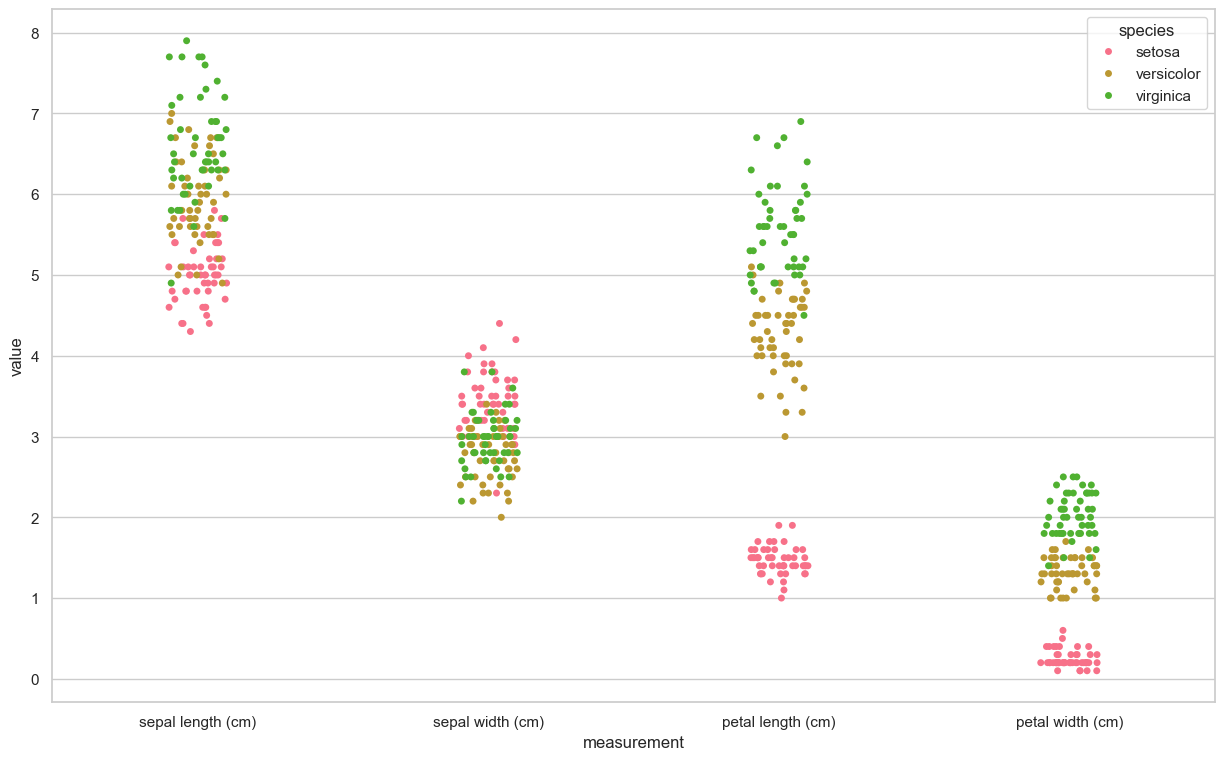

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl")

iris_melt = pd.melt(df, "species", var_name="measurement")
f, ax = plt.subplots(1, figsize=(15,9))
sns.stripplot(x="measurement", y="value", hue="species", data=iris_melt, jitter=True, edgecolor="white", ax=ax)

In [23]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values

In [24]:
y = np.where(y == 'setosa',-1,1)

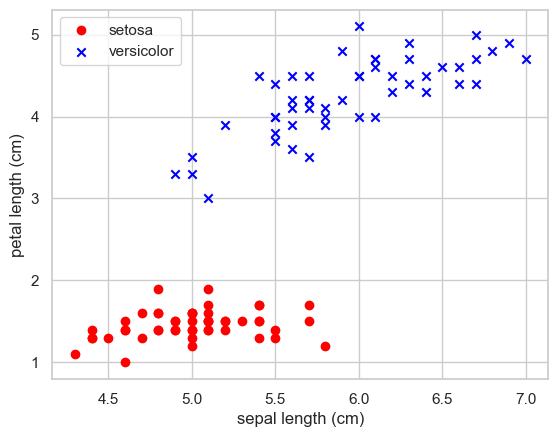

In [25]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

Dla tego typu danych separowalnych liniowo użyj modelu regresji logistycznej lub sieci neuronowej.

In [26]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5],[4,5.5]])
y_pred

array([-1,  1])

## Zapis danych i podłączenie do prostej bazy SQL 

In [27]:
IRIS_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(IRIS_PATH, names=col_names)

In [28]:
# save to sqlite
import sqlite3
# generate database
conn = sqlite3.connect("iris.db")
# pandas to_sql

try:
    df.to_sql("iris", conn, index=False)
except:
    print("tabela już istnieje")

In [29]:
# sql to pandas
result = pd.read_sql("SELECT * FROM iris WHERE sepal_length > 5", conn)

In [30]:
result.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.4,3.9,1.7,0.4,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa


In [31]:
# Dane sztucznie generowane
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10**4,
n_features=20, n_informative=2, n_redundant=2)


from sklearn.ensemble import RandomForestClassifier


# podział na zbiór treningowy i testowy
train_samples = 7000 # 70% danych treningowych

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rfc.predict(X_train[0].reshape(1, -1))

array([0])

## ZADANIA

1. Załaduj plik z danymi `train.csv` do pandasowej ramki danych o nazwie df

In [33]:
## YOUR CODE HERE
df = df = pd.read_csv('train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


2. Wypisz liczbę wierszy i kolumn załadowanej ramki 

In [34]:
## YOUR CODE HERE
print("Liczba wierszy:", df.shape[0])
print("Liczba kolumn:", df.shape[1])

Liczba wierszy: 891
Liczba kolumn: 12


3. Dokonaj czyszczenia braków danych:
    - opcja 1 - usuń wiersze zawierające brak danych (`dropna()`)
    - opcja 2 - usuń kolumny zawierające brak danych (`drop()`)
    - opcja 3 - dokonaj imputacji za pomocą wartości średniej (`fillna()`)

Które kolumny wybrałeś(aś) do realizacji poszczególnej opcji i dlaczego? 

In [36]:
## YOUR CODE HERE
df = df.drop('Cabin', axis=1)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


4. Korzystając z metody `nunique()` usuń kolumny, które nie nadają się do modelowania.

In [37]:
## YOUR CODE HERE
for column in df.columns:
     unique_count = df[column].nunique()
     print(f"Kolumna '{column}' ma {unique_count} unikalnych wartości.")


Kolumna 'PassengerId' ma 891 unikalnych wartości.
Kolumna 'Survived' ma 2 unikalnych wartości.
Kolumna 'Pclass' ma 3 unikalnych wartości.
Kolumna 'Name' ma 891 unikalnych wartości.
Kolumna 'Sex' ma 2 unikalnych wartości.
Kolumna 'Age' ma 88 unikalnych wartości.
Kolumna 'SibSp' ma 7 unikalnych wartości.
Kolumna 'Parch' ma 7 unikalnych wartości.
Kolumna 'Ticket' ma 681 unikalnych wartości.
Kolumna 'Fare' ma 248 unikalnych wartości.
Kolumna 'Embarked' ma 3 unikalnych wartości.


In [38]:
#COLUMNS TO DROP
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns_to_drop, axis=1)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


5. Zamień zmienne kategoryjne z wykorzystaniem `LabelEncoder` na postać numeryczną

In [42]:
from sklearn.preprocessing import LabelEncoder
## YOUR CODE HERE
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
    else:
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[[column]])

print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       0.0     1.0    1  0.271174  0.125    0.0  0.014151         2
1       1.0     0.0    0  0.472229  0.125    0.0  0.139136         0
2       1.0     1.0    0  0.321438  0.000    0.0  0.015469         2
3       1.0     0.0    0  0.434531  0.125    0.0  0.103644         2
4       0.0     1.0    1  0.434531  0.000    0.0  0.015713         2


6. Wykorzystaj `MinMaxScaler` do transformacji danych zmiennoprzecinkowych do wspólnej skali

In [43]:
from sklearn.preprocessing import MinMaxScaler

## YOUR CODE HERE
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
    else:
        df[column] = scaler.fit_transform(df[[column]])

print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       0.0     1.0  1.0  0.271174  0.125    0.0  0.014151  0.666667
1       1.0     0.0  0.0  0.472229  0.125    0.0  0.139136  0.000000
2       1.0     1.0  0.0  0.321438  0.000    0.0  0.015469  0.666667
3       1.0     0.0  0.0  0.434531  0.125    0.0  0.103644  0.666667
4       0.0     1.0  1.0  0.434531  0.000    0.0  0.015713  0.666667


7. Podziel dane na zbiór treningowy (0.8) i testowy (0.2)

In [47]:
from sklearn.model_selection import train_test_split 
## YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
print("Kształt X_train:", X_train.shape)
print("Kształt X_test:", X_test.shape)
print("Kształt y_train:", y_train.shape)
print("Kształt y_test:", y_test.shape)

Kształt X_train: (712, 7)
Kształt X_test: (179, 7)
Kształt y_train: (712,)
Kształt y_test: (179,)


8. Wykorzystując mapowanie możesz dla każdego pasażera przeprowadzić klasyfikację. Funkcja `run()` wymaga podania klasyfikatora dla pojedynczego przypadku.
   - Napisz klasyfikator przypisujący wartość 0 lub 1 w sposób losowy (możesz wykorzystać funkcję `random.randint(0,1)`).
   - Wykonaj fukncję `evaluate()` i sprawdź jak dobrze radzi sobie losowy klasyfikator. 


In [179]:
import random

def genearteRandomNumber(a):
    return random.randint(0,1)
    
classify = genearteRandomNumber



In [180]:
def run(f_classify, x):
    return list(map(f_classify, x))

def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions, actual))
    ))
    return f"{len(correct)} poprawnych przewidywan z {len(actual)}. Accuracy ({len(correct)/len(actual)*100:.0f}%)"

In [181]:
evaluate(run(classify, X_train.values), y_train.values)

'381 poprawnych przewidywan z 712. Accuracy (54%)'